<h1><center>PROJECT: Investigate TMDB Movie Dataset</center></h1>

![](cover_page.jpg)

## Table of Contents

 -  Introduction
 -  Data Wrangling
 -  Exploratory Data Analysis
 -  Conclusions

## INTRODUCTION


## Dataset Description

This data set contains information about 10,000 movies collected from The Movie Database (TMDb) from 1966 to 2015, including user ratings and revenue. The data is available at <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"> TMDB movie data </a>


● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
accounting for inflation over time.



### Questions
1. What is the trend of movie production over the years?
2. Which genres make more revenue?
3. What kind of properties are associated with movies with high revenues?
4. Does revenue depend on the movie release month
5. What are the movies that made a loss and why?
6. What are the reasons for popularity of a movie?

## Data Wrangling

In [1]:
# import all the required libaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# read the data
df = pd.read_csv("tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.info() 
#To have an idea of whether we have null values and where we have them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### DROP REDUNDANT COLUMNS

We have 2 budget columns and 2 revenue columns. We will be needing just one; the budget_adj and revenue_adj
 since they both give us the inflation rate equivalent in 2010.

In [7]:
df.drop(columns=['budget','revenue','imdb_id','vote_count'],inplace=True)

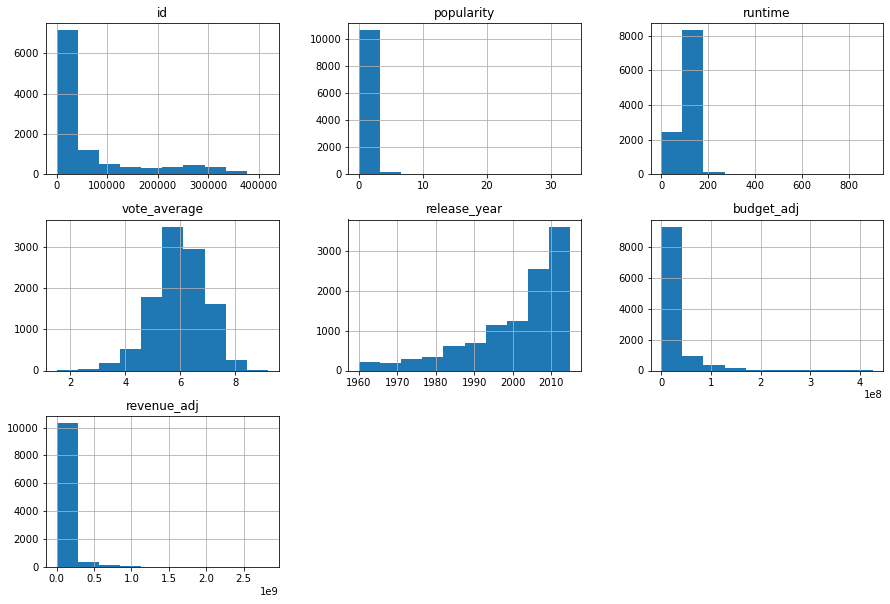

In [8]:
df.hist(figsize=(15,10));

### INSIGHT
From my describe cell and histogram cell, I can see that some columns are highly skewed for example the 'popularity' column
is skewed to the right with some extreme values(outliers). The same goes for the 'budget_adj', 'revenue_adj', 'vote_count',
and 'runtime' columns. Also The budget and revenue columns has $0 as its median which is not feasible. We will reduce these skewness and clean the revenue and budget columns by using a user defined function.

In [9]:
def reduce_skewness(df):
    
    # remove extreme values in the popularity column
    lowp,highp = df['popularity'].quantile([0,0.9])
    
    # create a popularity mask
    df_pop_mask = df['popularity'].between(lowp,highp)
    
    # remove extreme values from the runtime column
    low_runtime,high_runtime = df['runtime'].quantile([0,0.98])
    
    # create a runtime mask
    df_runtime_mask = df['runtime'].between(low_runtime,high_runtime)
    
    # replace movies with $0 as budget to the average budget values
    df['budget_adj'] = df['budget_adj'].replace(to_replace = 0,value = df['budget_adj'].mean())
    
     # replace movies with $0 as budget to the average budget values
    df['revenue_adj'] = df['revenue_adj'].replace(to_replace = 0,value = df['revenue_adj'].mean())
    
    # create a budget mask
    low_budg,high_budg = df['budget_adj'].quantile([0.008,0.9])
    df_budg_mask = df['budget_adj'].between(low_budg,high_budg)
    
    # create a revenue mask
    low_rev,high_rev = df['revenue_adj'].quantile([0.008,0.9])
    df_rev_mask = df['revenue_adj'].between(low_rev,high_rev)
    
    df_clean = df[df_pop_mask & df_runtime_mask & df_budg_mask & df_rev_mask]
    
    
    return df_clean
    

In [10]:
df_clean = reduce_skewness(df)

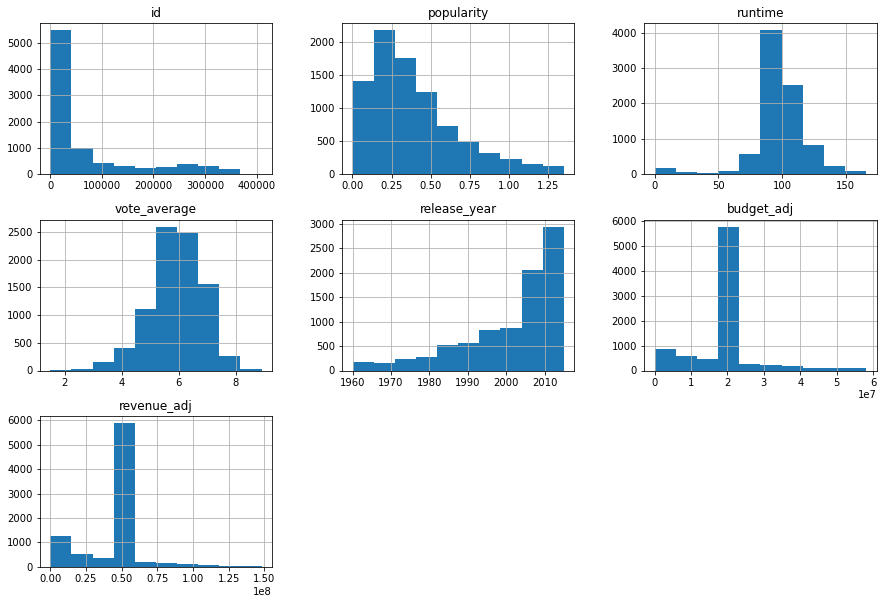

In [11]:
df_clean.hist(figsize=(15,10));

In [12]:
df_clean.skew()

id              1.660994
popularity      1.126737
runtime        -1.422999
vote_average   -0.441185
release_year   -1.201905
budget_adj      1.387444
revenue_adj     0.242361
dtype: float64

In [13]:
df_clean.dtypes

id                        int64
popularity              float64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 121 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8636 non-null   int64  
 1   popularity            8636 non-null   float64
 2   original_title        8636 non-null   object 
 3   cast                  8564 non-null   object 
 4   homepage              2049 non-null   object 
 5   director              8594 non-null   object 
 6   tagline               5999 non-null   object 
 7   keywords              7237 non-null   object 
 8   overview              8632 non-null   object 
 9   runtime               8636 non-null   int64  
 10  genres                8615 non-null   object 
 11  production_companies  7671 non-null   object 
 12  release_date          8636 non-null   object 
 13  vote_average          8636 non-null   float64
 14  release_year          8636 non-null   int64  
 15  budget_adj        

## What is the trend of movie production over the years?

 - Here we can explore questions like are more movies being produced over the years
 - Are movies getting shorter or longer
 - Relationship between budget, revenue and profit over the years

In [15]:
df = df_clean.copy(deep=True) # for easy typing

In [16]:
 # create profit column
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [17]:
df.head(2)

,id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
121,201085,1.345982,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,http://www.crimsonpeakmovie.com/,Guillermo del Toro,Beware.,haunted house|mining|murder|spitting blood|gothic,"In the aftermath of a family tragedy, an aspir...",119,Mystery|Thriller|Fantasy|Horror|Drama,Legendary Pictures,10/13/15,6.4,2015,5.059998e+07,6.870541e+07,1.810543e+07
122,277355,1.342839,Everly,Salma Hayek|Hiroyuki Watanabe|Jennifer Blanc|T...,NaN,Joe Lynch,Enter if you dare.,assassin|mob boss,"After she betrays a powerful mob boss, a woman...",90,Thriller|Action,Crime Scene Pictures|Radius-TWC|Anonymous Cont...,1/23/15,5.1,2015,1.755104e+07,5.136436e+07,3.381332e+07


### Are more movies being produced over the years?

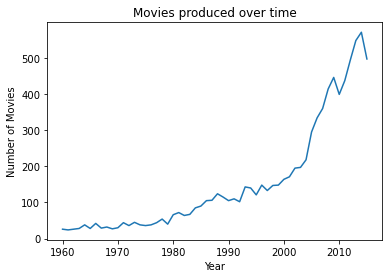

In [18]:
plt.plot(df.groupby('release_year')['id'].count())
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies produced over time');

We can clearly see that the number of movies being produced has gradually being increasing yearly with a massive increas in the 2000's

### Are movies getting shorter or longer?

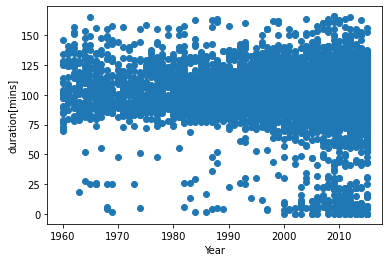

In [19]:
plt.scatter(df['release_year'],df['runtime'])
plt.xlabel('Year')
plt.ylabel('duration[mins]');

### Relationship between budget, revenue and profit over the years

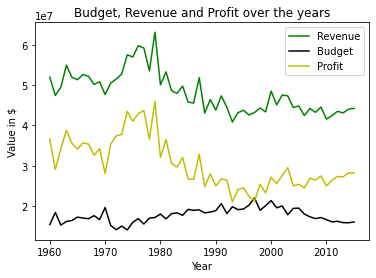

In [20]:
new_df = df.groupby('release_year')[['revenue_adj','budget_adj','profit']].mean()
new_df2 = new_df.reset_index()
plt.plot(new_df2['release_year'],new_df2['revenue_adj'],c='g',label='Revenue')
plt.plot(new_df2['release_year'],new_df2['budget_adj'],c='k',label='Budget')
plt.plot(new_df2['release_year'],new_df2['profit'],c='y',label='Profit')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Value in $')
plt.title('Budget, Revenue and Profit over the years');

From this plot, we see that from 1980 to 2000 there was a steady increase in the budget but revenue and profit decreased.

### 2. Which genres make more revenue?

From this scatter plot we can't see any clear trend with an increase in the runtime of movies over the years.
But from the year 2000 upwards we can see shorter movies being produced. What are these shorter movies?

In [21]:
df.genres.head()

121    Mystery|Thriller|Fantasy|Horror|Drama
122                          Thriller|Action
123                       Comedy|Drama|Music
124                          Horror|Thriller
125                 Romance|Thriller|Western
Name: genres, dtype: object

The genres column isn't clean enough for exoloration. So we need to work on it a bit.

In [22]:
# To get distinct genres column
df[['g1','g2','g3','g4','g5']] = df.genres.str.split("|",expand=True) 

In [23]:
df.head(3)

,id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,...,vote_average,release_year,budget_adj,revenue_adj,profit,g1,g2,g3,g4,g5
121,201085,1.345982,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,http://www.crimsonpeakmovie.com/,Guillermo del Toro,Beware.,haunted house|mining|murder|spitting blood|gothic,"In the aftermath of a family tragedy, an aspir...",119,...,6.4,2015,5.059998e+07,6.870541e+07,1.810543e+07,Mystery,Thriller,Fantasy,Horror,Drama
122,277355,1.342839,Everly,Salma Hayek|Hiroyuki Watanabe|Jennifer Blanc|T...,NaN,Joe Lynch,Enter if you dare.,assassin|mob boss,"After she betrays a powerful mob boss, a woman...",90,...,5.1,2015,1.755104e+07,5.136436e+07,3.381332e+07,Thriller,Action,None,None,None
123,264999,1.338481,Magic Mike XXL,Channing Tatum|Matt Bomer|Joe Manganiello|Kevi...,NaN,Gregory Jacobs,Back to the grind.,male friendship|strip club|road trip|strip tea...,Three years after Mike bowed out of the stripp...,115,...,6.3,2015,1.361599e+07,1.126200e+08,9.900397e+07,Comedy,Drama,Music,None,None


In [24]:
df['g1'].nunique()

20

In [25]:
unique_genres = list(df['g1'].unique())

In [26]:
unique_genres

['Mystery',
 'Thriller',
 'Comedy',
 'Horror',
 'Romance',
 'Drama',
 'Crime',
 'Adventure',
 'Family',
 'Action',
 'Animation',
 'History',
 'Music',
 'Western',
 'Documentary',
 'Fantasy',
 'War',
 'TV Movie',
 'Science Fiction',
 nan,
 'Foreign']

In [27]:
len(unique_genres)

21

In [28]:
del unique_genres[-2] #remove the nan

In [29]:
unique_genres

['Mystery',
 'Thriller',
 'Comedy',
 'Horror',
 'Romance',
 'Drama',
 'Crime',
 'Adventure',
 'Family',
 'Action',
 'Animation',
 'History',
 'Music',
 'Western',
 'Documentary',
 'Fantasy',
 'War',
 'TV Movie',
 'Science Fiction',
 'Foreign']

In [30]:
#Make different tables for distinct genres
df1 = df.drop(columns=['g2','g3','g4','g5']).rename(columns={'g1':'g'})
df2 = df.drop(columns=['g1','g3','g4','g5']).rename(columns={'g2':'g'})
df3 = df.drop(columns=['g2','g1','g4','g5']).rename(columns={'g3':'g'})
df4 = df.drop(columns=['g2','g3','g1','g5']).rename(columns={'g4':'g'})
df5 = df.drop(columns=['g2','g3','g1','g4']).rename(columns={'g5':'g'})

In [31]:
df1.shape

(8636, 19)

In [32]:
df2.shape

(8636, 19)

In [33]:
df3.shape

(8636, 19)

In [34]:
df4.shape

(8636, 19)

In [35]:
df5.shape

(8636, 19)

In [36]:
#merge these tables together
df_merge_genres = pd.concat([df1,df2,df3,df4,df5])

In [37]:
df_merge_genres.shape

(43180, 19)

In [38]:
df_merge_genres.reset_index(drop=True,inplace=True)

In [39]:
df_merge_genres.columns

Index(['id', 'popularity', 'original_title', 'cast', 'homepage', 'director',
       'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'profit', 'g'],
      dtype='object')

In [40]:
df_merge_genres.drop(columns='genres',inplace=True) #drop the dirty genres column since we can't use it

In [41]:
df_merge_genres[df_merge_genres['g'].isnull()==True] #check for null values

,id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,g
297,363869,0.244648,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,NaN,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,10/29/15,6.1,2015,1.755104e+07,5.136436e+07,3.381332e+07,NaN
488,361043,0.129696,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,NaN,A woman finds a VHS tape on her doorstep that ...,90,Ruthless Pictures|Hollywood Shorts,10/6/15,5.0,2015,1.755104e+07,5.136436e+07,3.381332e+07,NaN
749,287663,0.330431,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,10/3/14,6.8,2014,1.755104e+07,5.136436e+07,3.381332e+07,NaN
1363,21634,0.302095,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",NaN,"True story of Mary Griffith, gay rights crusad...",88,Daniel Sladek Entertainment,2/27/09,7.4,2009,1.755104e+07,5.136436e+07,3.381332e+07,NaN
1538,40534,0.020701,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,duringcreditsstinger,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,2/27/09,7.0,2009,1.755104e+07,5.136436e+07,3.381332e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43175,5060,0.087034,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,The sinister Dr Watt has an evil scheme going....,87,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,7.0,1966,1.755104e+07,5.136436e+07,3.381332e+07,None
43176,21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Bruce Brown Films,6/15/66,7.4,1966,1.755104e+07,5.136436e+07,3.381332e+07,None
43177,39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mosfilm,1/1/66,6.5,1966,1.755104e+07,5.136436e+07,3.381332e+07,None
43178,21449,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Benedict Pictures Corp.,11/2/66,5.4,1966,1.755104e+07,5.136436e+07,3.381332e+07,None


In [42]:
# drop null values
df_merge_genres.dropna(subset=['g'],inplace=True)

In [43]:
#check if we still have null values
df_merge_genres[df_merge_genres['g'].isnull()==True]

,id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,g


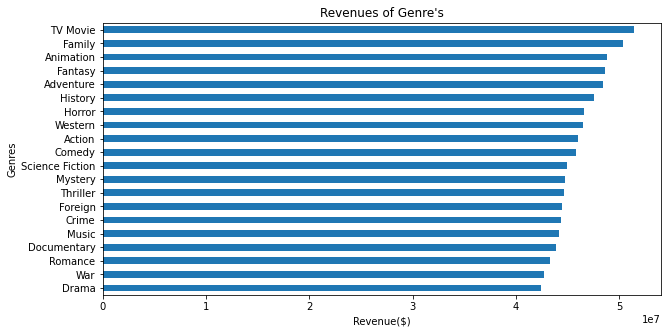

In [44]:
plt.figure(figsize=(10,5))
df_merge_genres.groupby('g').mean()['revenue_adj'].sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Genres')
plt.xlabel('Revenue($)')
plt.title("Revenues of Genre's");

From this plot we can clearly see that some genres like TV Movie, Family, Animation generate more revenue than genres like 'Romance', 'Drama','War'. For curiosity sake I need to know if the reason why those top 3 generate more revenue on average is because we have more movies in those genres.

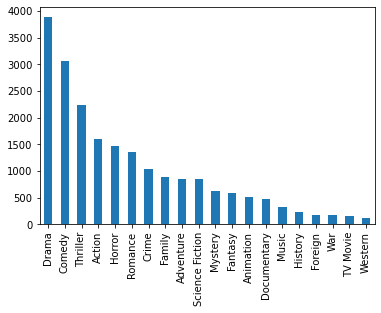

In [45]:
df_merge_genres['g'].value_counts().plot(kind='bar');

This plot clears our doubt strongly.

### 3.What kind of properties are associated with movies with high revenues?

In [46]:
df_clean.head(3)

,id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
121,201085,1.345982,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,http://www.crimsonpeakmovie.com/,Guillermo del Toro,Beware.,haunted house|mining|murder|spitting blood|gothic,"In the aftermath of a family tragedy, an aspir...",119,Mystery|Thriller|Fantasy|Horror|Drama,Legendary Pictures,10/13/15,6.4,2015,5.059998e+07,6.870541e+07
122,277355,1.342839,Everly,Salma Hayek|Hiroyuki Watanabe|Jennifer Blanc|T...,NaN,Joe Lynch,Enter if you dare.,assassin|mob boss,"After she betrays a powerful mob boss, a woman...",90,Thriller|Action,Crime Scene Pictures|Radius-TWC|Anonymous Cont...,1/23/15,5.1,2015,1.755104e+07,5.136436e+07
123,264999,1.338481,Magic Mike XXL,Channing Tatum|Matt Bomer|Joe Manganiello|Kevi...,NaN,Gregory Jacobs,Back to the grind.,male friendship|strip club|road trip|strip tea...,Three years after Mike bowed out of the stripp...,115,Comedy|Drama|Music,Warner Bros.|Iron Horse Entertainment (II),7/1/15,6.3,2015,1.361599e+07,1.126200e+08


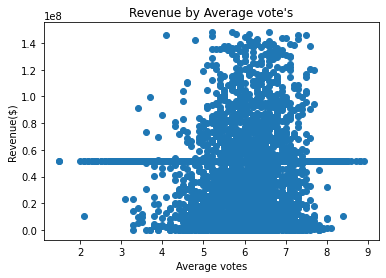

In [48]:
plt.scatter(df_clean['vote_average'],df_clean["revenue_adj"])
plt.xlabel('Average votes')
plt.ylabel('Revenue($)')
plt.title("Revenue by Average vote's");

We can clearly see that most of the movies have an average vote score between 4 and 8. Also there's relatively no corrrelation between revenue and average vote.

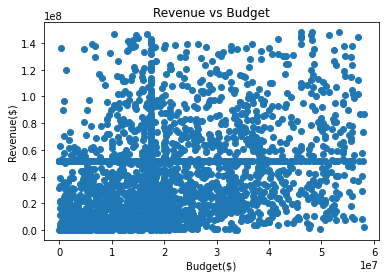

In [86]:
plt.scatter(df_clean['budget_adj'],df_clean["revenue_adj"])
plt.xlabel('Budget($)')
plt.ylabel('Revenue($)')
plt.title('Revenue vs Budget');

We can see here that movies with low budget generally have low revenue.
Also we have instances of movies with high budget but low revenue

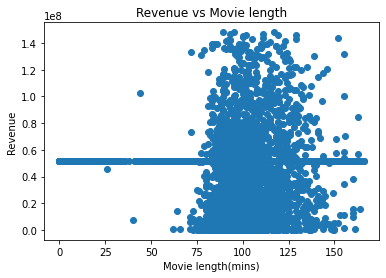

In [87]:
plt.scatter(df_clean['runtime'],df_clean["revenue_adj"])
plt.xlabel('Movie length(mins)')
plt.ylabel('Revenue')
plt.title('Revenue vs Movie length');

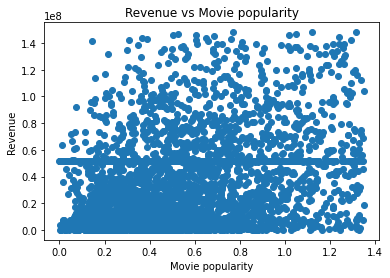

In [93]:
plt.scatter(df_clean['popularity'],df_clean["revenue_adj"])
plt.xlabel('Movie popularity')
plt.ylabel('Revenue')
plt.title('Revenue vs Movie popularity');

### 4. Which month did we generate the most revenue

In [90]:
#create a separate column for the month from the release date column
df_clean['release_month'] = df_clean['release_date'].str.split('/',expand=True)[0]

In [91]:
df_clean['release_month']

121      10
122       1
123       7
124      10
125       4
         ..
10860     5
10861     6
10863     1
10864    11
10865    11
Name: release_month, Length: 8636, dtype: object

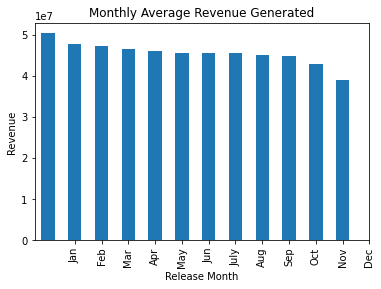

In [89]:
df_clean.groupby('release_month').mean()['revenue_adj'].sort_values(ascending=False).plot(kind='bar')
labels = ['Jan', 'Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
plt.title('Monthly Average Revenue Generated')
plt.xticks(np.arange(1,13),labels)
plt.xlabel('Release Month')
plt.ylabel('Revenue');


### Conclusion

1. It seems like the number of movies produced increases yearly.
   Limitations: we need a larger dataset to clearly establish this

2. Most movies are clustered around being 75-120 mins long and we can't really see a clear distinction in an increase with the length of a movie over the years. Also from the year <strong>2000</strong> we can see more shorter movies less than 50mins in length. I would have explored this dataset to see if this shorter movies are a particular type of genre that took a likened during the new era(<strong>2000's</strong>) but we have too many unique genres to do this

3. From the year 1980 to 2000 there was a steady increase in the budget but revenue and profit decreased.
   Limitations: We don't have enough information for this trend and additional research needs to be done to see why when budget increased we had a decrease in revenue.
   
4. Genre's like TV, Movie and Animation generated the most revenues

5. Movies released in the months of December and January generate the most revenues